In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

### Check npy

In [146]:
sinogram_path = "Data/sinogram.npy"

In [147]:
sinogram = np.load(sinogram_path)
sinogram.shape

(512, 180)

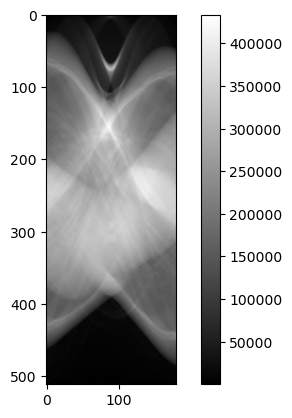

In [148]:
plt.imshow(sinogram, cmap='gray')
plt.colorbar()
plt.show()

### Setting Image Parameters

In [149]:
# 512px * 512px
nx = 512
ny = 512

# 2mm pixel
dx = 2

- need to know reason

In [150]:
x_T = (np.arange(1, nx+1)-(nx+1)/2)*dx
x = x_T.reshape(nx, 1)

In [151]:
y_T = (np.arange(1, ny+1)-(ny + 1) / 2) * -dx
y = y_T.reshape(ny, 1)

In [152]:
xx = np.repeat(x, ny, axis=1)
yy = np.repeat(y, nx, axis=1).T


- number of radial samples 
- number of ray spacing
- number of angular samples

In [153]:
nr = 180
dr = 1   
na = nr*2

- radial sample positions

In [154]:
r = dr * (np.arange(1, nr+1).T-(nr+1)/2)

- angular sample positions

In [155]:
angle = np.arange(0, na).T/na * np.pi

### Compute 0th moment
- as a function of the projection angle

In [156]:
projection = np.zeros(nr)
projection.shape

(180,)

In [157]:
for i in range(nr):
    projection_i = sinogram[:, i]
    projection[i] = sum(projection_i)

### Back projection

In [158]:
final_data = np.zeros([nx, ny])

In [159]:
test = np.ones((1,3))
result = np.tile(test, (3,1))
result[:,1]

array([1., 1., 1.])

In [160]:
for i in range(nr):
    projection_i = np.reshape(sinogram[:, i], (1,512))
    print(f"angle {i} of {nr}: ")
    projection_smear = np.tile(projection_i, (512,1))
    rot = rotate(projection_smear, i, reshape=False)
    final_data += rot

angle 0 of 180: 
angle 1 of 180: 
angle 2 of 180: 
angle 3 of 180: 
angle 4 of 180: 
angle 5 of 180: 
angle 6 of 180: 
angle 7 of 180: 
angle 8 of 180: 
angle 9 of 180: 
angle 10 of 180: 
angle 11 of 180: 
angle 12 of 180: 
angle 13 of 180: 
angle 14 of 180: 
angle 15 of 180: 
angle 16 of 180: 
angle 17 of 180: 
angle 18 of 180: 
angle 19 of 180: 
angle 20 of 180: 
angle 21 of 180: 
angle 22 of 180: 
angle 23 of 180: 
angle 24 of 180: 
angle 25 of 180: 
angle 26 of 180: 
angle 27 of 180: 
angle 28 of 180: 
angle 29 of 180: 
angle 30 of 180: 
angle 31 of 180: 
angle 32 of 180: 
angle 33 of 180: 
angle 34 of 180: 
angle 35 of 180: 
angle 36 of 180: 
angle 37 of 180: 
angle 38 of 180: 
angle 39 of 180: 
angle 40 of 180: 
angle 41 of 180: 
angle 42 of 180: 
angle 43 of 180: 
angle 44 of 180: 
angle 45 of 180: 
angle 46 of 180: 
angle 47 of 180: 
angle 48 of 180: 
angle 49 of 180: 
angle 50 of 180: 
angle 51 of 180: 
angle 52 of 180: 
angle 53 of 180: 
angle 54 of 180: 
angle 55 of 180: 
an

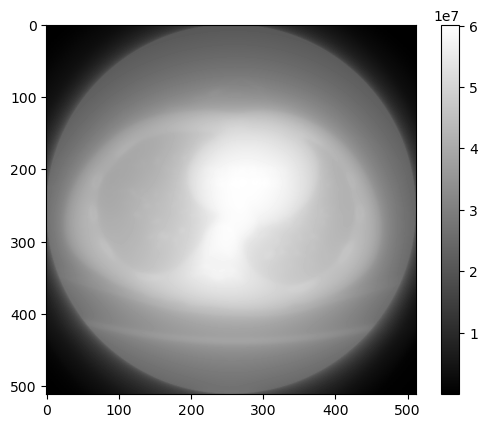

In [161]:
plt.imshow(final_data, cmap='gray')
plt.colorbar()
plt.show()

### FBP algorithm
- fft, fftshift to center low frequecy

In [162]:
sinogram_fft = np.fft.fft(sinogram)
sinogram_fft_shifted = np.fft.fftshift(sinogram_fft, axes=0)
print(sinogram_fft_shifted.shape)

(512, 180)


- making LAM-Lock
    - slope -1 till 128 and then +1 till 256

In [163]:
a = len(sinogram)
# freqs = np.linspace(-0.5, 0.5, a)
freqs = np.reshape(np.linspace(1, -1, a), (a, 1))
print(freqs.shape)

(512, 1)


In [164]:
ram_lak_filter = abs(freqs)
ram_lak_filter = np.tile(ram_lak_filter, (1, 180))
print(ram_lak_filter.shape)

(512, 180)


In [165]:
sinogramfilt = np.abs(np.fft.ifft(np.fft.ifftshift(sinogram_fft_shifted * ram_lak_filter)))

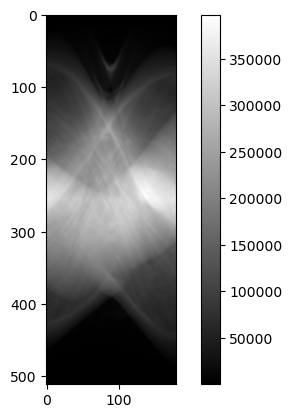

In [166]:
plt.imshow(sinogramfilt, cmap='gray')
plt.colorbar()
plt.show()

In [167]:
final_filtered_data = np.zeros([nx, ny])

In [168]:
for i in range(nr):
    print(f"angle {i} of {nr}: ")
    f_projection_i = np.reshape(sinogramfilt[:, i], (1,512))
    f_projection_smear = np.tile(f_projection_i, (512,1))
    f_rot = rotate(f_projection_smear, i, reshape=False)
    final_filtered_data += f_rot

angle 0 of 180: 
angle 1 of 180: 
angle 2 of 180: 
angle 3 of 180: 
angle 4 of 180: 
angle 5 of 180: 
angle 6 of 180: 
angle 7 of 180: 
angle 8 of 180: 
angle 9 of 180: 
angle 10 of 180: 
angle 11 of 180: 
angle 12 of 180: 
angle 13 of 180: 
angle 14 of 180: 
angle 15 of 180: 
angle 16 of 180: 
angle 17 of 180: 
angle 18 of 180: 
angle 19 of 180: 
angle 20 of 180: 
angle 21 of 180: 
angle 22 of 180: 
angle 23 of 180: 
angle 24 of 180: 
angle 25 of 180: 
angle 26 of 180: 
angle 27 of 180: 
angle 28 of 180: 
angle 29 of 180: 
angle 30 of 180: 
angle 31 of 180: 
angle 32 of 180: 
angle 33 of 180: 
angle 34 of 180: 
angle 35 of 180: 
angle 36 of 180: 
angle 37 of 180: 
angle 38 of 180: 
angle 39 of 180: 
angle 40 of 180: 
angle 41 of 180: 
angle 42 of 180: 
angle 43 of 180: 
angle 44 of 180: 
angle 45 of 180: 
angle 46 of 180: 
angle 47 of 180: 
angle 48 of 180: 
angle 49 of 180: 
angle 50 of 180: 
angle 51 of 180: 
angle 52 of 180: 
angle 53 of 180: 
angle 54 of 180: 
angle 55 of 180: 
an

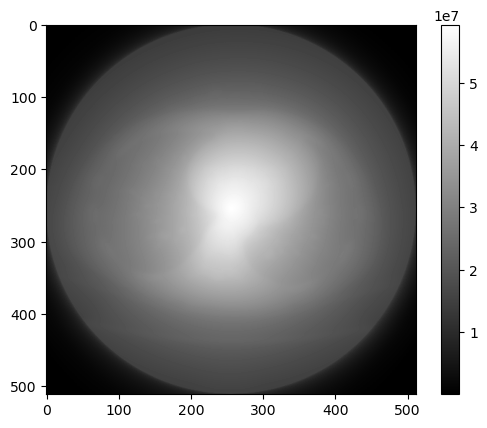

In [169]:
plt.imshow(final_filtered_data, cmap='gray')
plt.colorbar()
plt.show()